# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,249,85,34,53,127,58,6,116,58,17,121,137,197,127,70,3,20,185,189
1,515,76,38,58,125,58,5,133,51,18,127,152,259,145,87,0,21,177,184
2,721,105,54,108,234,70,12,215,31,24,168,226,687,228,68,4,22,189,201
3,825,86,39,84,149,57,8,156,43,20,133,185,358,157,74,0,23,183,190
4,601,93,39,78,164,66,8,139,48,18,140,157,290,126,64,4,7,201,208
5,85,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
6,492,85,43,66,130,57,6,151,45,19,143,173,333,168,86,4,9,180,183
7,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183
8,270,82,45,68,150,69,5,148,45,19,144,169,322,184,80,5,0,181,184
9,356,91,45,76,171,69,7,150,44,19,144,170,340,179,69,12,1,195,201


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.608379,93.555556,44.703097,81.442623,168.502732,61.779599,8.615665,167.766849,41.171220,20.508197,147.601093,188.003643,434.688525,173.925319,72.588342,6.479053,12.663024,189.060109,195.591985
std,244.803306,8.150227,6.187845,15.656989,33.774511,8.450838,5.169730,33.055200,7.827509,2.559943,14.499537,31.532858,175.489533,32.777839,7.851143,5.044512,9.051017,6.296073,7.502628
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,220.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,34.000000,19.000000,136.000000,166.000000,314.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,428.000000,93.000000,44.000000,78.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,178.000000,362.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,640.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,575.000000,196.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
# use Standart scaler to norm data by std
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
X_train = scale_features_std.fit_transform(X_train)
X_test = scale_features_std.transform(X_test)

In [7]:
X_train_pd = pd.DataFrame(X_train)
X_train_pd.describe()
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       549 non-null    float64
 1   1       549 non-null    float64
 2   2       549 non-null    float64
 3   3       549 non-null    float64
 4   4       549 non-null    float64
 5   5       549 non-null    float64
 6   6       549 non-null    float64
 7   7       549 non-null    float64
 8   8       549 non-null    float64
 9   9       549 non-null    float64
 10  10      549 non-null    float64
 11  11      549 non-null    float64
 12  12      549 non-null    float64
 13  13      549 non-null    float64
 14  14      549 non-null    float64
 15  15      549 non-null    float64
 16  16      549 non-null    float64
 17  17      549 non-null    float64
 18  18      549 non-null    float64
dtypes: float64(19)
memory usage: 81.6 KB


##### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn import model_selection, linear_model, metrics
labels = list(tuple(target))
log_regressor = linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [9]:
c_values = [100, 10, 1.0, 0.1, 0.01]
grid_search = model_selection.GridSearchCV(estimator=log_regressor, param_grid=dict(C=c_values), n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795993 using {'C': 100}
0.795993 (0.041283) with: {'C': 100}
0.790505 (0.037600) with: {'C': 10}
0.788620 (0.041343) with: {'C': 1.0}
0.743131 (0.034242) with: {'C': 0.1}
0.673906 (0.035343) with: {'C': 0.01}


In [10]:
log_regressor = linear_model.LogisticRegression(C=grid_result.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
log_regressor.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [11]:
lr_proba_predictions = log_regressor.predict_proba(X_test)
lr_predictions = log_regressor.predict(X_test)
labels = list(tuple(y_train))

In [12]:
from sklearn import metrics

In [13]:
metrics.accuracy_score(y_test, lr_predictions)

0.797979797979798

In [14]:
metrics.f1_score(y_test, lr_predictions, labels=labels, average='weighted')

0.7965809837663005

In [15]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#! pip install scikit-plot

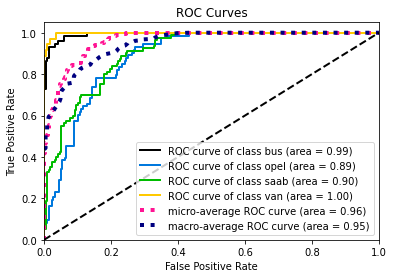

In [16]:
import scikitplot
scikitplot.metrics.plot_roc(y_test, lr_proba_predictions)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()

In [19]:
pca.fit(X_train)
pca.n_components_

19

In [20]:
pca.explained_variance_ratio_

array([4.92771916e-01, 1.57474578e-01, 1.06624042e-01, 6.10499733e-02,
       5.18612434e-02, 4.89455708e-02, 2.79654429e-02, 1.75809639e-02,
       1.21438088e-02, 8.48989919e-03, 4.63439853e-03, 3.48896786e-03,
       2.23875478e-03, 1.85493024e-03, 1.12113391e-03, 7.63438710e-04,
       6.46962832e-04, 3.25397362e-04, 1.85769799e-05])

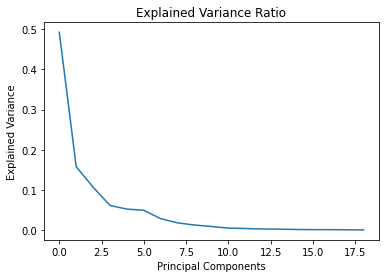

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(pca.n_components_), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [22]:
#save components that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.98)
pca.fit(X_train)
print(pca.n_components_)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

10


In [23]:
pd.DataFrame(X_test_pca).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       297 non-null    float64
 1   1       297 non-null    float64
 2   2       297 non-null    float64
 3   3       297 non-null    float64
 4   4       297 non-null    float64
 5   5       297 non-null    float64
 6   6       297 non-null    float64
 7   7       297 non-null    float64
 8   8       297 non-null    float64
 9   9       297 non-null    float64
dtypes: float64(10)
memory usage: 23.3 KB


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [24]:
log_regressor = linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [25]:
c_values = [100, 10, 1.0, 0.1, 0.01]
grid_search = model_selection.GridSearchCV(estimator=log_regressor, param_grid=dict(C=c_values), n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_pca, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.708586 using {'C': 0.1}
0.701246 (0.052339) with: {'C': 100}
0.699428 (0.049761) with: {'C': 10}
0.708519 (0.051656) with: {'C': 1.0}
0.708586 (0.039632) with: {'C': 0.1}
0.652088 (0.027539) with: {'C': 0.01}


In [26]:
log_regressor = linear_model.LogisticRegression(C=grid_result.best_params_['C'],multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
log_regressor.fit(X_train_pca, y_train)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [27]:
lr_proba_predictions = log_regressor.predict_proba(X_test_pca)
lr_predictions = log_regressor.predict(X_test_pca)

metrics.accuracy_score(y_test, lr_predictions)

0.6531986531986532

In [28]:
metrics.f1_score(y_test, lr_predictions, labels=labels, average='weighted')

0.6426177533318631

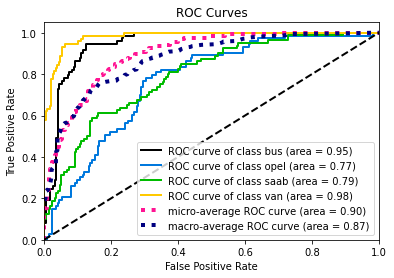

In [29]:
scikitplot.metrics.plot_roc(y_test, lr_proba_predictions)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [31]:
depths_val = range(25)
grid_search = model_selection.GridSearchCV(estimator=tree, param_grid=dict(max_depth=depths_val), n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.695758 using {'max_depth': 22}
0.000000 (0.000000) with: {'max_depth': 0}
0.404276 (0.032249) with: {'max_depth': 1}
0.544714 (0.038010) with: {'max_depth': 2}
0.650168 (0.036378) with: {'max_depth': 3}
0.662963 (0.056841) with: {'max_depth': 4}
0.690269 (0.040460) with: {'max_depth': 5}
0.686667 (0.032643) with: {'max_depth': 6}
0.677441 (0.043694) with: {'max_depth': 7}
0.681111 (0.041204) with: {'max_depth': 8}
0.684714 (0.041492) with: {'max_depth': 9}
0.673805 (0.044681) with: {'max_depth': 10}
0.686667 (0.025863) with: {'max_depth': 11}
0.686667 (0.039931) with: {'max_depth': 12}
0.681145 (0.033759) with: {'max_depth': 13}
0.692088 (0.040854) with: {'max_depth': 14}
0.675724 (0.027307) with: {'max_depth': 15}
0.679327 (0.037395) with: {'max_depth': 16}
0.684815 (0.042018) with: {'max_depth': 17}
0.684815 (0.031179) with: {'max_depth': 18}
0.677576 (0.034689) with: {'max_depth': 19}
0.688418 (0.032101) with: {'max_depth': 20}
0.690269 (0.030161) with: {'max_depth': 21}
0.6

In [32]:
tree = DecisionTreeClassifier(max_depth=grid_result.best_params_['max_depth'])
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=22)

In [33]:
tr_proba_predictions = tree.predict_proba(X_test)
tr_predictions = tree.predict(X_test)

metrics.accuracy_score(y_test, tr_predictions)

0.7003367003367004

In [34]:
metrics.f1_score(y_test, tr_predictions, labels=labels, average='weighted')

0.6984515835643841

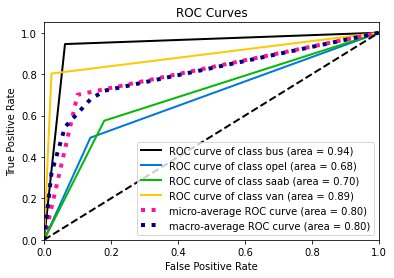

In [35]:
scikitplot.metrics.plot_roc(y_test, tr_proba_predictions)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [36]:
from sklearn.ensemble import BaggingClassifier
d3_bag = [model_selection.cross_val_score(BaggingClassifier(base_estimator=tree, n_estimators=n), X_train, y_train, scoring='accuracy').mean() for n in range(2, 100, 5)]
#lr_bag = [model_selection.cross_val_score(BaggingClassifier(base_estimator=log_regressor, n_estimators=n), X_train, y_train, scoring='accuracy').mean() for n in range(2, 100, 5)]

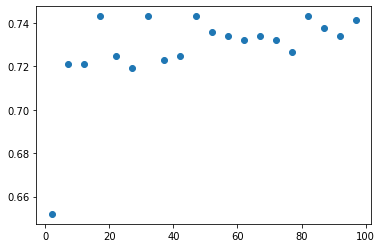

In [37]:
plt.scatter(range(2, 100, 5), d3_bag)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [38]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [39]:
# YOUR CODE HERE